<a href="https://colab.research.google.com/github/ozyeon/DataTranslator_2022/blob/main/SC_W1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. pandas 활용

1. pandas로 시리즈 및 데이터 프레임 만들기(Data 전처리 및 탐색)

* Data 분석/기획 6단계: 전처리 -> 탐색 -> 조작 -> 모델링 -> 분석 -> 평가
* imputing, scaling, partitioning

In [11]:
import pandas as pd

df1 = pd.read_csv("adv.csv")    # DataFrame 만들기
#df1.info()       # DataFrame의 Information 제시
df1.describe()    # 변수별 요약값을 제시

df1.columns       # 컬럼명만 출력
df1.index         # 행 이름 출력
df1.values        # 실제 값이 2차원 array로 출력
df1.shape

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [17]:
# 데이터 프레임에서 특정 컬럼(변수) 선택
df1.TV      # 데이터프레임 이름, 컬럼 이름
df1["TV"]   # 데이터프레임[컬럼명]
df1.iloc[0:200, 1]  # 데이터프레임 인덱싱 & 슬라이싱 응용 -> 모든 행, 2번째 열 출력
# df1[0:200, 1] -> 바로 array 스타일 인덱싱 & 슬라이싱 사용할 경우 에러 발생

# 데이터 프레임에서 2개 이상의 특정 컬럼(변수) 선택
# df1["TV","sales"] -> [] 안에는 하나의 변수만 들어가야 하므로 에러 발생!
df1[["TV","sales"]]     # 리스트라는 하나의 변수가 들어있으므로 정상 작동
df1.iloc[0:200, [1,4]]  # 2개 이상의 컬럼 위치를 리스트로 묶어서 사용

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [6]:
df2 = pd.read_csv("binary.csv")
df2.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [27]:
df2.columns

df2.iloc[0:400, [0,2]]
df2.iloc[0:20, [1,3]]

# 1. admit - 범주형 변수
df2["admit"].unique()         # 고유한 값 출력
df2["admit"].value_counts()   # 각 범주별 빈도

# 2. gre, gpa - 수치형 변수
df2["gre"].mean()             # 평균값
df2["gre"].max()              # 최대값
df2[["gre","gpa"]].mean()     # 변수별 요약

gre    587.7000
gpa      3.3899
dtype: float64

In [ ]:
import pandas as pd # 참고: from pandas import Series, Series함수를 바로 사용 가능
import numpy as np

s1 = pd.Series( [ 1,2,3,4,5]  )
s2 = pd.Series( np.array( [5,4,3,2,1] ) )

print( s1.values )
print( s1.index ) 

[1 2 3 4 5]
RangeIndex(start=0, stop=5, step=1)


In [ ]:
df1 = pd.DataFrame( [[1,2], [3,4], [5,6]])
df2 = pd.DataFrame( np.array( [[1,2], [3,4], [5,6]] ))

print(df1.columns)

[[1 2]
 [3 4]
 [5 6]]
RangeIndex(start=0, stop=3, step=1)
RangeIndex(start=0, stop=2, step=1)


In [ ]:
df1 = pd.DataFrame( [[1,2], [3,4], [5,6]],
                   index=['a', 'b', 'c'],
                   columns= ['c1','c2']  )
df1.index = ['a1', 'b1', 'c1']

2. 시리즈 및 데이터프레임 수정하기

In [ ]:
s1.index = [ 'a', 'b', 'c', 'd', 'e']
s2.index = [11, 12, 13, 14, 15]


In [ ]:
df1.index = ['2022-04-28','2022-04-29', '2022-04-30']
df2.index = ['2022-04-26','2022-04-27', '2022-04-28']

df1.columns = ['c1', 'c2']
df2.columns = ['c2', 'c3']


3. 시리즈 및 데이터프레임 연산

In [ ]:
print(s1+100)
print(s1+s2)

s1.index = [1,2,3,4,5]
s2.index = [1,2,3,4,5]
print(s1+s2)

a    101
b    102
c    103
d    104
e    105
dtype: int64
a    NaN
b    NaN
c    NaN
d    NaN
e    NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
dtype: float64
1    6
2    6
3    6
4    6
5    6
dtype: int64


In [ ]:
print(df1+20)
print(df1+df2)

            c1  c2
2022-04-28  21  22
2022-04-29  23  24
2022-04-30  25  26
            c1   c2  c3
2022-04-26 NaN  NaN NaN
2022-04-27 NaN  NaN NaN
2022-04-28 NaN  7.0 NaN
2022-04-29 NaN  NaN NaN
2022-04-30 NaN  NaN NaN


In [ ]:
df1.columns = ['c1', 'c2']
df2.columns = ['c1', 'c2']

print(df1+df2)

             c1   c2
2022-04-26  NaN  NaN
2022-04-27  NaN  NaN
2022-04-28  6.0  8.0
2022-04-29  NaN  NaN
2022-04-30  NaN  NaN


In [ ]:
df1.index = ['2022-04-28','2022-04-29', '2022-04-30']
df2.index = ['2022-04-28','2022-04-29', '2022-04-30']
print(df1+df2)

            c1  c2
2022-04-28   2   4
2022-04-29   6   8
2022-04-30  10  12


4. 기타 

In [ ]:
df2.head()  #head라는 method(함수같은...)를 사용함, 앞의 5?6?행을 보여줌.
df2.tail()  #맨 뒤의 5-6행을 보여줌.
df2.describe() #descriptive statistics를 변수별로 보여줌

,c1,c2
count,3.0,3.0
mean,3.0,4.0
std,2.0,2.0
min,1.0,2.0
25%,2.0,3.0
50%,3.0,4.0
75%,4.0,5.0
max,5.0,6.0


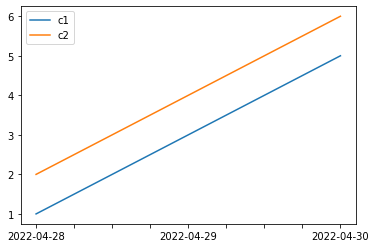

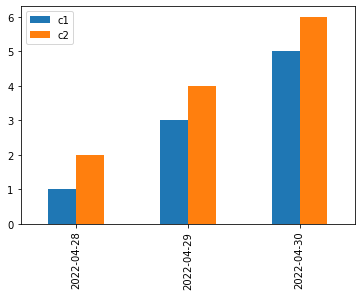

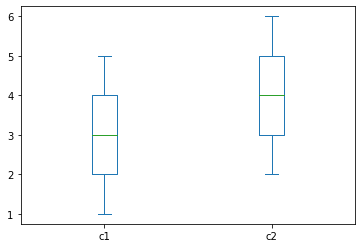

In [ ]:
df2.plot()
df2.plot.bar()
df1.plot.box()  #box plot

# II. 데이터프레임 인덱싱과 슬라이싱

1. 데이터프레임 인덱싱과 슬라이싱 활용

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6],[7,8,9]]), columns=['A','B','C'])
df.A    #특정 컬럼 선택, Series
df['A']

#.loc[]: 인덱스 라벨에 사용,loc[2]이면, 2라는 라벨을 갖는 인덱스를 의미
#.iloc[]: 인덱스에 사용, iloc[2]는 2의 위치(3번째)의미

df.iloc[ 0 , 1 ]  #numpy array 처럼 사용하기
df.iloc[ :, 1 ]

df.loc[: , 'A']
df.loc[ 1, 'B'] #여기서1은 index가 1을 의미
df.iloc[ 1, 1 ] #여기서의 1은 두번째값이라는 의미

5

In [ ]:
#print(df.iloc[0][0])	# iloc[]
#print(df.loc[0]['A'])	# loc[]
#print(df.iloc[0])	# iloc[]로 행선택

print(df.loc[:,'A'])	# loc[]로 열선택
print(df.loc[0,'A'])	
print(df.iloc[0,0])	

#df에서 2행, 1-2열 선택하시오.
df.iloc[ 1  , 0:2  ]

#df에서 2-3행, 1-3열 선택하시오.
df.iloc[ 1:3,  :  ]

0    1
1    4
2    7
Name: A, dtype: int64
1
1


,A,B,C
1,4,5,6
2,7,8,9


2. 데이터프레임 처리

In [40]:
import numpy as np

# 데이터프레임 컬럼 추가
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['D'] = df.index
df.head()

# 데이터프레임 컬럼 삭제 또는 행 삭제
df = df.drop("D", axis=1)   # inplace=True 를 사용하면 원본 df에 삭제 동작이 반영됨
df

df['E'] = df.index
df.head()
df.drop(["B","E"], axis=1, inplace=True)
df

# 데이터프레임끼리 결합
pd.concat([df,df], axis=0)  # 행을 추가
pd.concat([df,df], axis=1)  # 열을 추가

,A,C,A,C
0,1,3,1,3
1,4,6,4,6
2,7,9,7,9


In [ ]:
#열 추가
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['D'] = df.index

#열 추가2
df = pd.DataFrame(data=np.array([[1, 1, 2], [3, 2, 4]]))
df.loc[:, 4] = pd.Series(['5', '6'], index=df.index)	# Append a column to `df`
print(df)

# A 열 삭제
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df.drop('A', axis=1, inplace=True)  #A열을 삭제한 데이터프레임을 df라는 데이터프레임에 반영하는 옵션.
df.drop(df.columns[[1]], axis=1)	#axis값이 0: row, 1: column 

#행 삭제
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]),index= [2.5, 12.6, 4.8, 4.8, 2.5],  columns=[48, 49, 50])
print(df.drop(df.index[1]))	# 인덱스 1 위치 행 삭제

   0  1  2  4
0  1  1  2  5
1  3  2  4  6
     48  49  50
2.5   1   2   3
4.8   7   8   9
4.8  40  50  60
2.5  23  35  37


3. 데이터프레임 내 값 변경

In [46]:
# 문자열을 0~4로 교체
df = pd.DataFrame(data=np.array([['OK', 'Perfect', 'Acceptable'], ['Awful','Awful', 'Perfect'], ['Acceptable', 'OK', 'Poor']]), columns=['Student1', 'Student2', 'Student3'])
df
df.replace(['Awful', 'Poor', 'OK', 'Acceptable', 'Perfect'], [0, 1, 2, 3, 4], inplace=True) 	  #inplace=True인 경우, df에 반영, 그렇지 않으면 미반영
df

,Student1,Student2,Student3
0,2,4,3
1,0,0,4
2,3,2,1


In [ ]:
#정규표현식으로 문자열 제거
df = pd.DataFrame(data=np.array([['1\n', 2, '3\n'], [4, 5, '6\n'], [7, '8\n', 9]]))
df.replace({'\n': '<br>'}, regex=True)	#regex=True는 regular expression을 쓰겠다라는 의미, 문자들의 패턴으로 문자열처리.
df.replace({'\n': ''}, regex=True)	# replace 에서 딕셔너리를 이용해서 바꿀 대상이 key, 바꾼 후의 결과값이 되어야 하는 것이 value

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [48]:
df2

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


4. 데이터프레임에 함수 적용하여 처리하기

In [51]:
#행/열에 함수 적용
def doubler(x):
    if x % 2 == 0:  #짝수이면,
        return x
    else:
        return x * 2  #홀수이면  두 배를 해서 

def binarize(x):
  if x >5 :
    return 1
  else:
    return 0

binarize( 4 )
doubler( 5 )

10

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['A'].apply(doubler)	# doubler라는 함수를 A열에 적용, 함수이름을 apply 메소드의 입력으로 사용

doubled_df = df.applymap(doubler)	# `applymap()`는 데이터프레임 전체에 행/열 단위 적용시
print(doubled_df)

df['A'].apply( binarize)
df.applymap( binarize)

    A   B   C
0   2   2   6
1   4  10   6
2  14   8  18


,A,B,C
0,0,0,0
1,0,0,1
2,1,1,1


In [65]:
df2   # binary.csv 읽어온 DataFrame

def func1(x):
  if x == 1:
    return "pass"
  else:
    return "nonpass"

func1(0)

df2["admit2"] = df2["admit"].apply(func1)
df2

,admit,gre,gpa,rank,admit2
0,0,380,3.61,3,nonpass
1,1,660,3.67,3,pass
2,1,800,4.00,1,pass
3,1,640,3.19,4,pass
4,0,520,2.93,4,nonpass
...,...,...,...,...,...
395,0,620,4.00,2,nonpass
396,0,560,3.04,3,nonpass
397,0,460,2.63,2,nonpass
398,0,700,3.65,2,nonpass


* missing, scaling, partitioning, linear regression

In [87]:
# adv.csv를 adv로 읽으세요
adv = pd.read_csv("adv.csv", index_col=0)   # 1번째 컬럼을 index로 지정
adv

# missing
adv.isnull().mean()   # missing이 없음!(모두 평균이 0)
adv.head()

# scaling
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler().fit_transform(adv)   # (값-최소값) / (최대값-최소값) -> 0~1 사이의 값이 나옴
scaled    # 2차원 array

scaled_df = pd.DataFrame(scaled, columns=adv.columns)   # 2차원 array -> DataFrame 변경(adv의 컬럼명 그대로 사용)
scaled_df

# partitioning -> training set / testing set
from sklearn.model_selection import train_test_split

train, test = train_test_split(scaled_df, test_size=0.3)   # 결과는 랜덤(주어진 데이터를 두 덩어리로 나눠줌)
print(train.shape)
print(test.shape)

# modeling -> y변수는 sales, x변수는 나머지
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(train[["TV","radio"]], train["sales"])   # 선형회귀
model.coef_   # TV와 radio의 기울기(중요도) 출력

(140, 4)
(60, 4)


array([0.54502871, 0.35345177])

5. 엑셀 또는 CSV로 데이터프레임 생성

In [ ]:
df = pd.read_excel('OnlineRetail2.xlsx')	#upload 후 읽기
df.head() #앞의 5개 행을 출력해보기
df.columns 
df.describe()
df['NewCol'] = df['UnitPrice'].apply( binarize )
df.NewCol

0        0
1        0
2        0
3        0
4        0
        ..
29994    1
29995    0
29996    0
29997    0
29998    1
Name: NewCol, Length: 29999, dtype: int64

In [ ]:
df = pd.read_csv('data_3.csv')
df.artist.str.strip()
df['artist'] = df['artist'].str.strip()	

In [ ]:
df.dropna(axis=0, subset=['user'], inplace=True)  #결측치가 있는 행은 없애고, inplace이니까 df에 반영
df['user'] = df['user'].astype('str')		#astype은 값의 type을 바꿔줌. str로 바꾸기.
df.describe()

,qty
count,19999.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


6. 데이터프레임 연습

In [ ]:
import numpy as np
import pandas as pd

def get_first_cabin(row):
	try:
		return row.split()[0]	#값을 공백 등으로 나누고, [0]은 첫번째 값을 선택하는 의미.
	except:
		return np.nan

data = pd.read_csv("titanic_raw.csv")
data = data.replace('?', np.nan)	#?를 np.nan으로 replace
data['cabin'] = data['cabin'].apply(get_first_cabin)

data.to_csv('titanic.csv', index=False)	#index=True면 index도 csv에 한 컬럼처럼 저장됨, index=False면 그렇지 않음.


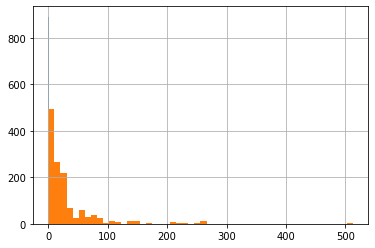

In [ ]:
#eda
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data.dtypes #컬럼별 값의 타잎

data['sibsp'].unique()

data['fare'].unique()[0:20]

#embarked, cabin에 대해서도 확인해보기

#Histogram
data['sibsp'].hist(bins=20)
data['fare'].hist(bins=50)


In [ ]:
data.isnull() #값이 있는지 없는지 T, F로 체크, T는 1로 취급, F는 0으로 취급,
data.isnull().sum()	#변수별 missing value의 수
data.isnull().mean() 	#변수별 missing value 비율

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

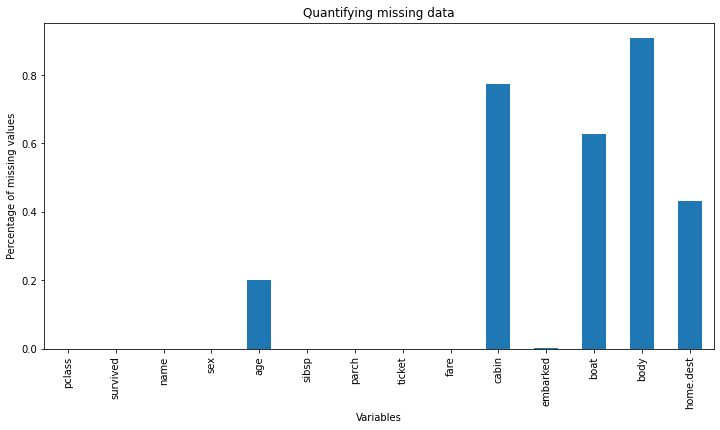

In [ ]:
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

# III. 데이터프레임을 이용한 전처리

1. Imputing
- Source: credit approval dataset(crx data): http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/


In [ ]:
#Complete case analysis: missing value가 하나라도 있는 행은 제거 / Missing이 적은 경우에 사용
import pandas as pd
data = pd.read_csv('creditApprovalUCI.csv')

data.isnull().mean().sort_values(ascending=True)
#data의 컬럼별로 missing을 체크해서, 컬럼별로 평균 / True, False / 각 컬럼별로 missing value의 비율, 정렬도 시킴

data_cca = data.dropna()#how='any', 하나라도 missing이 있는 행 제거
print(data.shape)
print(data_cca.shape)

(690, 16)
(564, 16)


In [ ]:
#또는 특정 변수에 대해서도 사용할 수 있음
data.dropna(subset=['A3', 'A4'])  #좋은방법!

#모든 변수에서 missing이어야 해당 행 제거
data.dropna(how='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


- Mean or Median Imputation

In [ ]:
#missing을 평균이나 중앙값 대체(numerical 변수에 적용), 
#주로 train에서의 평균/중앙값을 계산 후 test나 이후의 경우에 사용
#정규분포인 경우에만 적용, 그 외에는 데이터를 왜곡
import pandas as pd
from sklearn.impute import SimpleImputer

data = pd.read_csv('creditApprovalUCI.csv')
print(data.isnull().mean())

A1     0.017391
A2     0.017391
A3     0.133333
A4     0.008696
A5     0.008696
A6     0.013043
A7     0.013043
A8     0.133333
A9     0.133333
A10    0.133333
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.018841
A15    0.000000
A16    0.000000
dtype: float64


In [ ]:
#sklearn으로 imputing-이 방법을 사용!
data = pd.read_csv('creditApprovalUCI.csv')

#수치형 변수로만 구성된 데이터프레임 만들기
data_num = data[['A2', 'A3', 'A8', 'A11', 'A15']]
print(data_num.isnull().mean())

#데이터프레임의 컬럼 선택하는 방법
# 데이터프레임['컬럼이름']
# 데이터프레임[ ['컬럼이름1', '컬럼이름2', '컬럼이름3' ]]

imputer = SimpleImputer(strategy='median')  #또는 mean
imputer.fit(data_num) #median값을 찾아줌.
print(imputer.statistics_)
data_num = imputer.transform(data_num)  #np.array가 결과이므로 필요 시 다시 dataframe 변환
data_num_df = pd.DataFrame(data_num)
print(data_num_df.isnull().mean())

A2     0.017391
A3     0.133333
A8     0.133333
A11    0.000000
A15    0.000000
dtype: float64
[28.46  2.54  1.    0.    5.  ]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64


In [ ]:
#imputing mode or frequent category
import pandas as pd
from sklearn.impute import SimpleImputer

data = pd.read_csv('creditApprovalUCI.csv')

data_cat = data[['A4', 'A5', 'A6', 'A7']]
print(data_cat.isnull().mean())

imputer = SimpleImputer(strategy='most_frequent')
#가장 빈번하게 발생하는 범주로 missing을 대체
#imputer.fit(data_cat)
#imputer.statistics_
#data_cat = imputer.transform(data_cat)

#아래처럼 한 번에 수행해도 됨
data_cat = imputer.fit_transform(data_cat)

data_cat_df = pd.DataFrame( data_cat )
print(data_cat_df.isnull().mean())

A4    0.008696
A5    0.008696
A6    0.013043
A7    0.013043
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64


2. Partitioning

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
train, test = train_test_split(data, test_size=0.3)

#컬럼 삭제: .drop 메소드, axis=1로 지정, labels에 컬럼 이름 지정
data.drop(labels=['A16'], axis=1) #단, 원본 데이터프레임인 data에는 반영안되고, A16컬럼이 제거된 새로운 데이터프레임이 출력됨.
print(data['A16'])

#data.drop(labels=['A16'], axis=1, inplace=True) #inplace=True를 지정하면 원본 데이터프레임인 data에 반영됨
#print(data['A16'])

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: A16, Length: 690, dtype: int64


In [ ]:
X = data.drop(labels=['A16'], axis=1)#data에서 A16변수만 지우고...
y = data['A16']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

3. Imputing+Partitionig+Scaling

In [ ]:
#standard scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('creditApprovalUCI.csv')
data_num = data[['A2', 'A3', 'A8', 'A11', 'A15']] #수치형 변수로 구성된 data_num
columns_name = data_num.columns

imputer = SimpleImputer(strategy='median')
data_num = imputer.fit_transform(data_num) 
data_num_df = pd.DataFrame(data_num, columns = columns_name)

X_train, X_test = train_test_split( data_num_df, test_size=0.3)

In [ ]:
scaler = StandardScaler()

#X_train만 스케일링할 경우
X_train_scaled = scaler.fit_transform(X_train)

#X_train의 평균, 표준편차로 다른 데이터프레임도 스케일링 할 경우
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #다만, 변환 후에는 numpy array
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
#minmax scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# IV. Scipy 이용 통계량 계산

0. 데이터 읽기

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp

data = pd.read_csv("creditset2.csv")


1. 공분산

In [ ]:
import numpy as np
import scipy as sp

A=data.age
B=data.income

print(sp.cov(A,B))   #공분산

[[ 1.75892573e+02 -6.64700713e+03]
 [-6.64700713e+03  2.05243649e+08]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  import sys


2. 상관관계

In [ ]:
import numpy as np
from scipy import stats

A=data.age
B=data.income
C=data.loan

print(stats.pearsonr(A,B))   #상관관계
print(stats.pearsonr(A,C))   #상관관계


(-0.03498384417456003, 0.1178115340192192)
(0.006561002944344477, 0.7693412420940746)


3. Paired T-test

In [ ]:
from scipy import stats 
before_ad = [100, 110, 105, 115, 100, 90]
after_ad = [140, 130, 115, 125, 110, 110]

tTestResult= stats.ttest_rel(before_ad, after_ad)
print(tTestResult)

Ttest_relResult(statistic=-3.8413666267326794, pvalue=0.012106854691433334)


4. 분산분석과 다중비교

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


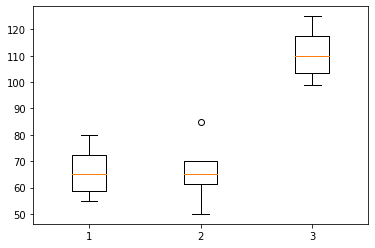

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1 = [60, 70, 80, 55]
group2 = [50, 65, 85, 65]
group3 = [105, 115, 99, 125]
plot_data = [group1, group2, group3]

ax = plt.boxplot(plot_data)
plt.show()


In [ ]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=17.419898513954344, pvalue=0.0008047905831477702)

In [ ]:
values = [60, 70, 80, 55 ,50, 65, 85, 65, 105, 115, 99, 125]
group = [1,1,1,1,2,2,2,2,3,3,3,3]

tukey = pairwise_tukeyhsd(endog=values,     # Data
                          groups=group,   # Groups
                          alpha=0.05)          # Significance level
tukey.summary()              # See test summary


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.0,0.9,-24.4218,24.4218,False
1,3,44.75,0.0016,20.3282,69.1718,True
2,3,44.75,0.0016,20.3282,69.1718,True


5. scipy 이용 선형회귀분석

In [ ]:
import pandas as pd
df = pd.read_csv("adv.csv")
df.columns
X=df.TV
Y=df.sales

In [ ]:
from scipy import stats
model1 = stats.linregress( X,Y)
model1

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703)

In [ ]:
import pandas as pd
df2 = pd.DataFrame( [[1,2,3], [4,5,6]])
df2.iloc[ :, 1]

0    2
1    5
Name: 1, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
df = df.iloc[:, 1:5]

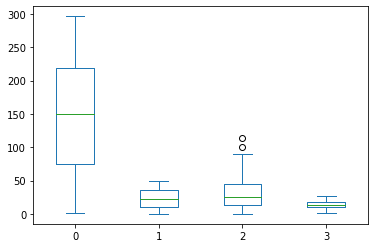

In [ ]:

imputer = SimpleImputer(strategy='mean')  
imputer.fit(df) 
df3_imputed = imputer.transform(df) 
df3_imputed_df = pd.DataFrame( df3_imputed )
df3_imputed_df.plot.box()
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3_imputed)
train, test = train_test_split( df3_scaled, test_size=0.3)



In [ ]:
train_df = pd.DataFrame( train, columns = df.columns)
test_df = pd.DataFrame( test, columns = df.columns)

In [ ]:
train_df.drop('sales', axis=1) #inplace=True

In [ ]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(train_df.drop('sales', axis=1), train_df.sales)

LinearRegression()

In [ ]:
y_predicted = line_fitter.predict(test_df.drop('sales', axis=1))

In [ ]:
np.mean( (y_predicted-test_df.sales)**2 )

0.09445666227100988